In [1]:
from numpy import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def f(x,a,b,c):
    return a*np.exp(b*x)*np.sin(2*np.pi*x+c)

In [3]:
csv_in = '../vibration.csv'
%config InlineBackend.figure_formats = {'png', 'retina'}

In [4]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(200, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


,x,y
0,-1.461658,-0.851052
1,-1.441970,-1.301433
2,-1.441574,-0.625615
3,-1.438549,-0.057903
4,-1.437801,-0.185529


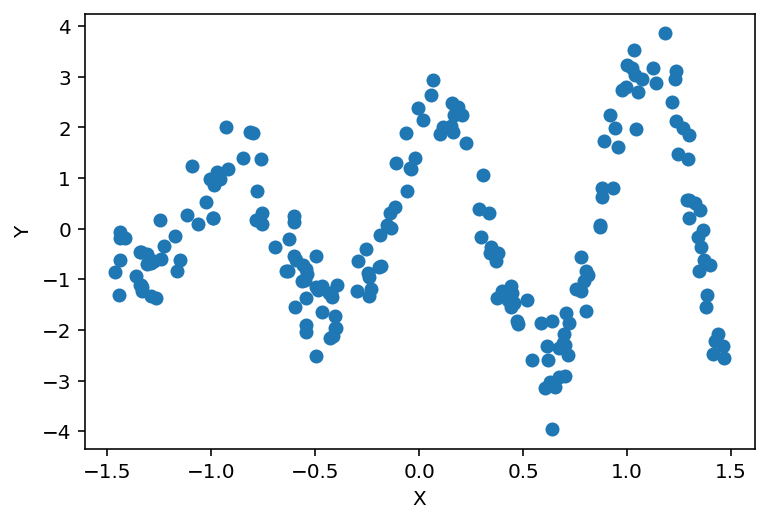

In [5]:
plt.scatter(df['x'],df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
popt, pcov = curve_fit(f, df['x'], df['y'])

In [7]:
print(popt)

[2.01374478 0.49162167 0.98982846]


In [8]:
print(pcov)

[[ 3.30579649e-03 -1.11107948e-03 -8.80160869e-06]
 [-1.11107948e-03  1.03555686e-03 -1.37212732e-05]
 [-8.80160869e-06 -1.37212732e-05  3.57979410e-04]]


In [9]:
y_reg = f(df['x'], *popt)  # *var: unpacking of list/tuple var

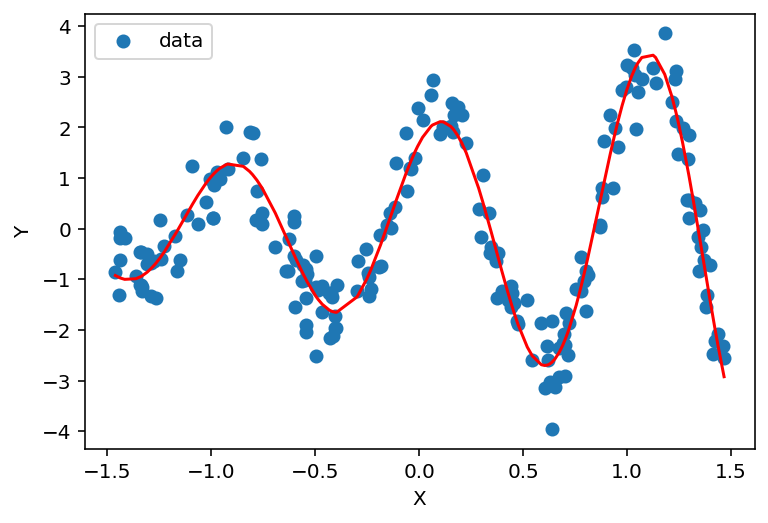

In [13]:
plt.scatter(df['x'], df['y'], label='data')
#lbl = 'f(x)=({0:.3f})x**3+({1:.3f})x**2+({2:.3f})x+({3:.3f})'.format(*popt)
plt.plot(df['x'], y_reg, color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()